In [7]:
#bring the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
%matplotlib inline

In [8]:
#import a spreadsheet file containing sieving data of a coarse sand and gravel sample (one phi interval)
df = pd.read_csv(r'C:\pathtoyourfile\filename.csv')

In [9]:
df.head(10) #This is just to show an example

,Size_class,phi,phi_mid,wt_sieve,wt_sieve_sample,wt_sample,wt_percent,cumul_wt_percent
0,>8,-3,-3.5,514.66,514.66,0.00,0.00,0.00
1,Pebble,-2,-2.5,488.20,488.76,0.56,0.14,0.14
2,Granule,-1,-1.5,484.80,500.97,16.17,4.09,4.23
3,v. coarse sand,0,-0.5,400.70,463.09,62.39,15.79,20.02
4,coarse sand,1,0.5,416.83,521.18,104.35,26.40,46.42
5,medium sand,2,1.5,334.70,473.45,138.75,35.11,81.53
6,fine sand,3,2.5,331.60,403.58,71.98,18.21,99.74
7,v. fine sand,4,3.5,363.88,364.70,0.82,0.21,99.95
8,silt and clay,5,4.5,351.08,351.27,0.19,0.05,100.00


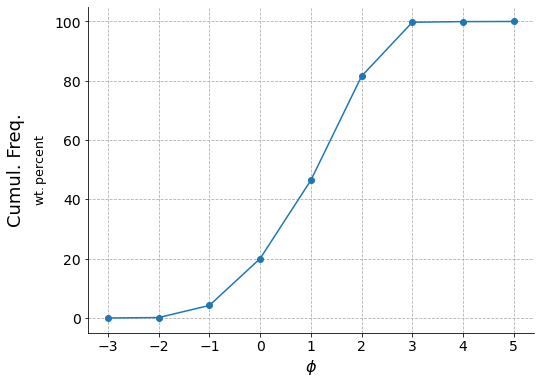

[[ -3.     0.  ]
 [ -2.     0.14]
 [ -1.     4.23]
 [  0.    20.02]
 [  1.    46.42]
 [  2.    81.53]
 [  3.    99.74]
 [  4.    99.95]
 [  5.   100.  ]]


In [10]:
#Make a cumulative freq. graph of grain size using phi values for the x axis

fig,ax = plt.subplots(figsize=(8, 6))

x=df['phi'].values
y=df['cumul_wt_percent'].values

# Hide the right and top lines of the default box
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#PLot the dots and line and assign ticks and labels
plt.plot(x, y, marker='o')
lines = plt.gca().lines[0].get_xydata()  #Create an array of the points along the line
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel(r'$\phi$', fontsize=16)
plt.ylabel('Cumul. Freq.\n$\\regular_{wt. percent}$', fontsize=18) #r'$\alpha > \beta$'

#Add the grid lines and show the plot
ax.grid(True, linestyle='--')
plt.show()
#For some reason, the image is cropped without the bbox info
#fig.savefig('B_5_cumFq.svg', bbox_inches = 'tight', format='svg')
print(lines)

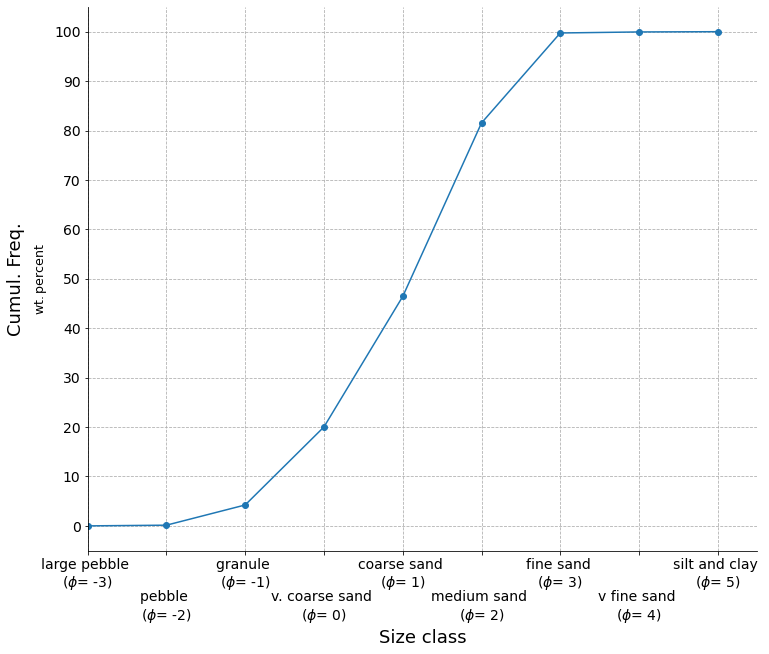

In [11]:
#Make a cumulative freq. graph of grain size using size categories for the x axis

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_yticks( np.linspace(0, 100, 11 ) )

x=df['phi'].values
y=df['cumul_wt_percent'].values

# Hide the right and top lines of the default box
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#PLot the dots and line and assign ticks and labels
plt.plot(x, y, marker='o')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Size class', fontsize=18)
plt.ylabel('Cumul. Freq.\n$\\regular_{wt. percent}$', fontsize=18) #r'$\alpha > \beta$'

xticks = [ -3, -2, -1, 0, 1, 2, 3, 4, 5 ]
xlbls = ['large pebble \n($\phi$= -3)', 'pebble \n($\phi$= -2)', 'granule \n($\phi$= -1)', 'v. coarse sand \n($\phi$= 0)', 'coarse sand \n($\phi$= 1)', 'medium sand \n($\phi$= 2)', 'fine sand \n($\phi$= 3)', 'v fine sand \n($\phi$= 4)', 'silt and clay \n($\phi$= 5)']

ax.set_xticks( xticks )
ax.set_xticklabels( xlbls )
ax.set_xlim(-3, 5.5)

# vertical alignment of xtick labels
va = [ 0, -.06, 0, -.06, 0, -.06, 0, -.06 ]
for t, y in zip( ax.get_xticklabels( ), va ):
    t.set_y( y )


#Add the grid lines and show the plot
ax.grid(True, linestyle='--')
plt.show()
#For some reason, the image is cropped without the bbox info
#fig.savefig('B_5_cumFq2.svg', bbox_inches = 'tight', format='svg')



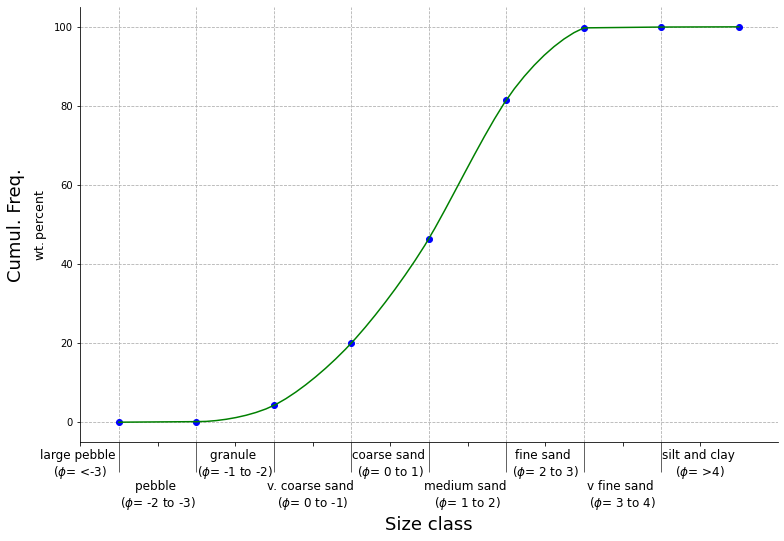

In [12]:
#Same graph but this time with a RBF-linear combo interpolation

x=df['phi'].values
y=df['cumul_wt_percent'].values
xi = np.linspace(-2.0, 3.0, 40) 
xj=np.linspace(3.0, 5.0, 10) #That one is for the short linear line at the right extremity
xk=np.linspace(-3.0, -2.0, 10) #That one is for the short linear line at the left extremity


fig = plt.figure(figsize=(12.5,8))
ax = fig.add_subplot(1,1,1) # row-col-num
ax.set_xlim((-3.0, 5.5,))

# Hide the right and top lines of the default box
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#PLot the dots and line and assign ticks and labels
plt.plot(x, y, 'bo')

plt.xlabel('Size class', fontsize=18)
plt.ylabel('Cumul. Freq.\n$\\regular_{wt. percent}$', fontsize=18) #r'$\alpha > \beta$'

# use RBF method
rbf = Rbf(x, y, function='thin_plate')
fi = rbf(xi)

rbf=Rbf(x, y, function='linear')
fj=rbf(xj)

rbf=Rbf(x, y, function='linear')
fk=rbf(xk)

plt.plot(xi, fi, 'g')
plt.plot(xj, fj, 'g')
plt.plot(xk, fk, 'g')

#location of the ticks and their labels
xticks = [ -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5 ]
xticks_minor = [ -3, -2, -1, 0, 1, 2, 3, 4 ]
xlbls = ['large pebble \n($\phi$= <-3)', 'pebble \n($\phi$= -2 to -3)', 'granule \n($\phi$= -1 to -2)', 
'v. coarse sand \n($\phi$= 0 to -1)', 'coarse sand \n($\phi$= 0 to 1)', 'medium sand \n($\phi$= 1 to 2)', 'fine sand \n($\phi$= 2 to 3)', 'v fine sand \n($\phi$= 3 to 4)', 'silt and clay \n($\phi$= >4)']

ax.set_xticks( xticks )
ax.set_xticks( xticks_minor, minor=True )
ax.set_xticklabels( xlbls, fontsize=12 )

ax.tick_params( axis='x', which='minor', direction='out', length=30 )
#ax.tick_params( axis='x', which='major', bottom='off', top='off' ) optional to show ticks at the top

# vertical alignment of xtick labels
va = [ 0, -.07, 0, -.07, 0, -.07, 0, -.07 ]
for t, y in zip( ax.get_xticklabels( ), va ):
    t.set_y( y )

#Add the grid lines
ax.grid(True, which='minor', axis='x', linestyle='--')
ax.grid(True, which='major', axis='y', linestyle='--')

#For some reason, the image is cropped without the bbox info
#fig.savefig('B_5_cumFq2.svg', bbox_inches = 'tight', format='svg')


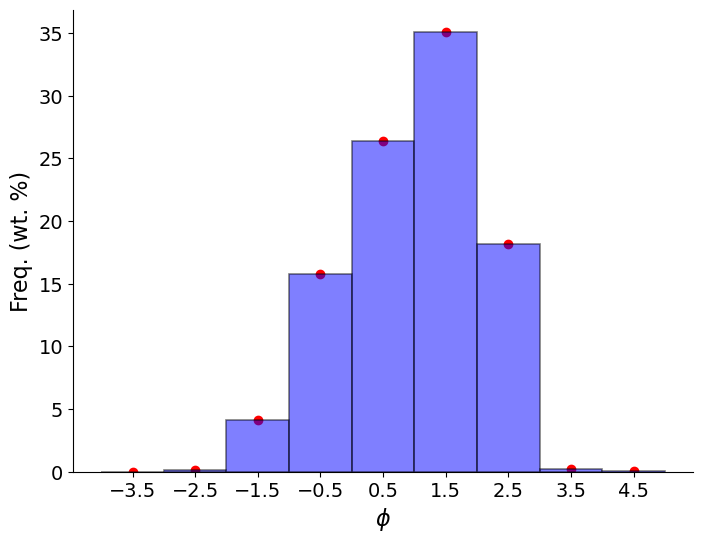

In [13]:
#to get the default black frame
plt.style.use('default') 
fig,ax = plt.subplots(figsize=(8,6))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
x_mid=df['phi_mid'].values


#Make the bar plot
plt.bar(x_mid, df['wt_percent'], color=('b'),  alpha=0.5, edgecolor='black', linewidth=1.2, width=1.0)   #alpha is for transparency

plt.xticks(x_mid, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$\phi$', fontsize=16)
plt.ylabel('Freq. (wt. %)', fontsize=16)

#Add the points
plt.scatter(x_mid, df['wt_percent'], c='red', marker='o')

fig.savefig('B_5_Hist_new.svg', bbox_inches = 'tight', format='svg')